In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D

In [3]:
# Define paths
train_dir = '/content/drive/MyDrive/Colab Notebooks/New/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/New/train'

# ImageDataGenerator for loading and augmenting data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15)  # Using 15% of the data for validation

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 2040 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.


In [5]:
# Load the VGG16 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
from tensorflow.keras.optimizers import Adam
# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 630s 9s/step - accuracy: 0.6107 - loss: 0.6592 - val_accuracy: 0.7557 - val_loss: 0.5254
Epoch 2/10
 1/63 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.7812 - loss: 0.5868

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7812 - loss: 0.5868 - val_accuracy: 0.7500 - val_loss: 0.4430
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 271ms/step - accuracy: 0.7673 - loss: 0.4820 - val_accuracy: 0.8068 - val_loss: 0.4482
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8438 - loss: 0.4316 - val_accuracy: 1.0000 - val_loss: 0.3097
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 266ms/step - accuracy: 0.8513 - loss: 0.3739 - val_accuracy: 0.8381 - val_loss: 0.3805
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.2634 - val_accuracy: 1.0000 - val_loss: 0.2306
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 268ms/step - accuracy: 0.9071 - loss: 0.2764 - val_accuracy: 0.8523 - val_loss: 0.3671
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.2787 - val_accuracy: 0.7500 - val_loss: 0.3181
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - accuracy: 0.9031 - loss: 0.2561 - val_accuracy: 0.8438 - val_l

In [1]:
from tensorflow.keras.utils import plot_model
#plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

C:\Users\Lenovo\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Error in sys.excepthook:
Traceback (most recent call last):
  File "C:\Users\Lenovo\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1979, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ImportError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Lenovo\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1981, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "C:\Users\Lenovo\miniconda3\lib\site-packages\IPython\core\ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\Len

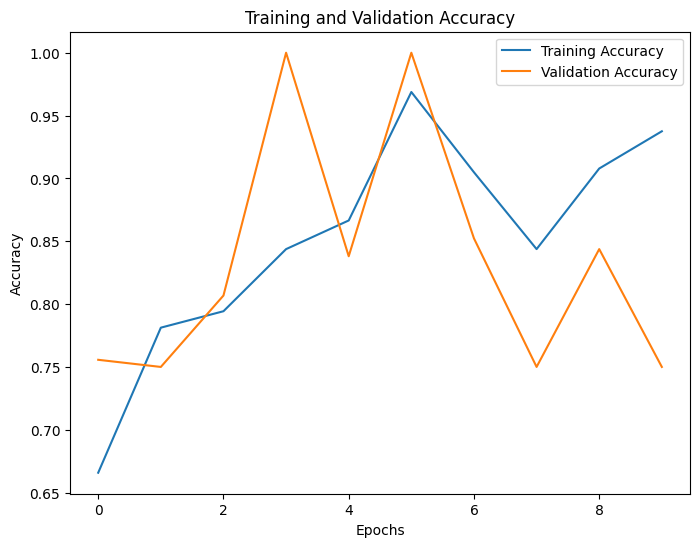

In [8]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step
Accuracy: 0.9333
Precision: 0.9522
Recall: 0.9125
F1-score: 0.9319
Confusion Matrix
[[1145   55]
 [ 105 1095]]
Classification Report
              precision    recall  f1-score   support

  NoActivity       0.92      0.95      0.93      1200
 YesActivity       0.95      0.91      0.93      1200

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



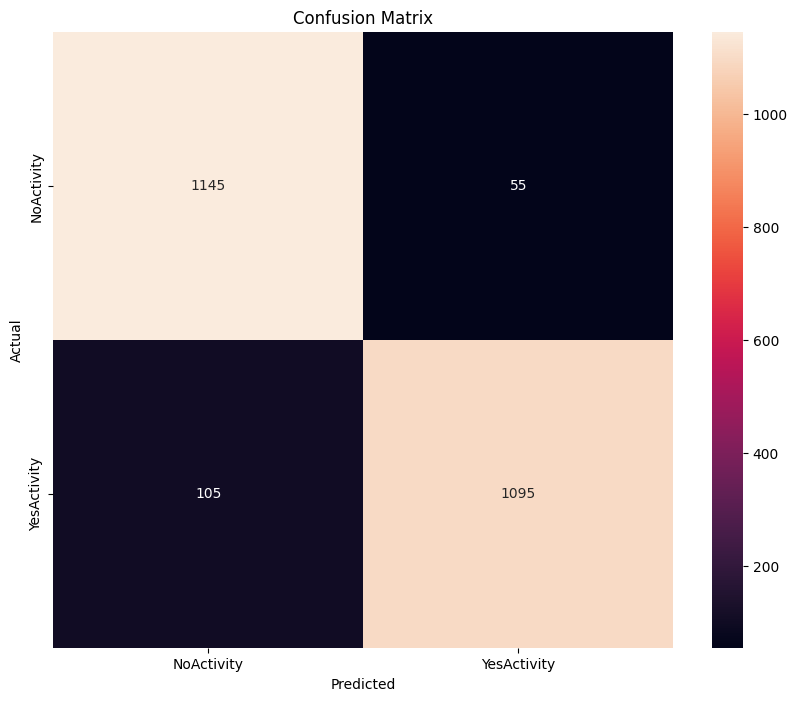

In [9]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
test_generator.reset()
Y_pred = model.predict(test_generator, test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)



accuracy = accuracy_score(test_generator.classes, y_pred)
precision = precision_score(test_generator.classes, y_pred)
recall = recall_score(test_generator.classes, y_pred)
f1 = f1_score(test_generator.classes, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Confusion matrix and classification report
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
cm_plot_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()